Potato Disease Classification

Import all the Dependencies

In [79]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [80]:
import os

data_path = r"C:\Users\Asus\OneDrive\Tài liệu\Desktop\data_sets\Potato_Dataset\training"
print("Exists:", os.path.exists(data_path))  # Should print True


Exists: True


In [156]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 50

In [82]:

dataset = tf.keras.utils.image_dataset_from_directory(
    r"PlantVillage",
    shuffle =  True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)



Found 2152 files belonging to 3 classes.


In [83]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [84]:
len(dataset)

68

In [85]:
# View one batch of images and labels
for images, labels in dataset.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.numpy())


Image batch shape: (32, 256, 256, 3)
Label batch shape: [2 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 2 0 1 2 0 1 0 0 1 1 1 0 1]


In [86]:
print(images[0].numpy())
# print(images[0])

[[[188. 177. 185.]
  [181. 170. 178.]
  [173. 162. 170.]
  ...
  [176. 163. 170.]
  [174. 161. 168.]
  [249. 236. 243.]]

 [[182. 171. 179.]
  [181. 170. 178.]
  [178. 167. 175.]
  ...
  [184. 171. 178.]
  [162. 149. 156.]
  [144. 131. 138.]]

 [[176. 165. 173.]
  [180. 169. 177.]
  [182. 171. 179.]
  ...
  [215. 202. 209.]
  [218. 205. 212.]
  [167. 154. 161.]]

 ...

 [[201. 188. 195.]
  [213. 200. 207.]
  [205. 192. 199.]
  ...
  [207. 188. 190.]
  [185. 166. 168.]
  [155. 136. 138.]]

 [[173. 160. 167.]
  [199. 186. 193.]
  [178. 165. 172.]
  ...
  [146. 127. 129.]
  [179. 160. 162.]
  [182. 163. 165.]]

 [[160. 147. 154.]
  [194. 181. 188.]
  [159. 146. 153.]
  ...
  [181. 162. 164.]
  [166. 147. 149.]
  [163. 144. 146.]]]


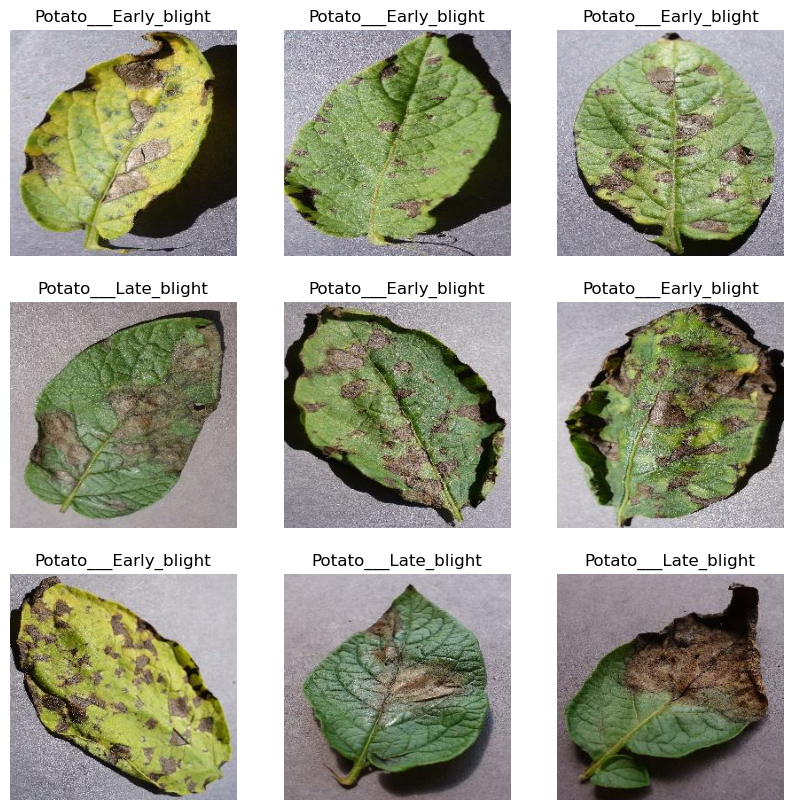

In [87]:


plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [92]:
# 80% ==> training
# 20% ==> 10% validation,10% test

In [94]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [126]:
train_ds = dataset.take(54)
len(train_ds)

54

In [127]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [128]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [129]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [131]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [132]:
train_ds, val_ds, test_ds =  get_dataset_partitions_tf(dataset)

In [133]:
len(train_ds)

54

In [134]:
len(val_ds)

6

In [135]:
len(test_ds)

8

In [137]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [143]:
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])


In [146]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])


In [149]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [152]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [153]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [157]:
history = model.fit(
    train_ds,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    verbose=1,
     validation_data=val_ds,
   
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.4891 - loss: 3.6902 - val_accuracy: 0.6719 - val_loss: 0.8286
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.6913 - loss: 0.7652 - val_accuracy: 0.6406 - val_loss: 0.7601
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8096 - loss: 0.5444 - val_accuracy: 0.7917 - val_loss: 0.5734
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8367 - loss: 0.4449 - val_accuracy: 0.9062 - val_loss: 0.2323
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8955 - loss: 0.2685 - val_accuracy: 0.9010 - val_loss: 0.2268
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4623s 87s/step - accuracy: 0.9166 - loss: 0.2165 - val_accuracy: 0.9479 - val_loss: 0.1626
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9533 - loss: 0.1253 - val_accuracy: 0.9583 - val_loss: 0.1041
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9549 - loss: 0.1061 - val_accuracy: 0.9740 - val_lo

In [158]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.9866 - loss: 0.0457


In [159]:
scores

[0.07072599232196808, 0.984375]

In [160]:
history

In [161]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [162]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [163]:
history.history['accuracy']

[0.5416666865348816,
 0.7164351940155029,
 0.8130787014961243,
 0.8518518805503845,
 0.8929398059844971,
 0.9137731194496155,
 0.9479166865348816,
 0.9450231194496155,
 0.9386574029922485,
 0.9618055820465088,
 0.9479166865348816,
 0.9675925970077515,
 0.9907407164573669,
 0.9855324029922485,
 0.9930555820465088,
 0.9994212985038757,
 0.9884259104728699,
 0.9768518805503845,
 0.9762731194496155,
 0.9878472089767456,
 0.9479166865348816,
 0.9751157164573669,
 0.9959490895271301,
 0.9756944179534912,
 0.9693287014961243,
 0.9791666865348816,
 0.9924768805503845,
 0.9982638955116272,
 0.9976851940155029,
 0.9994212985038757,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [164]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
 

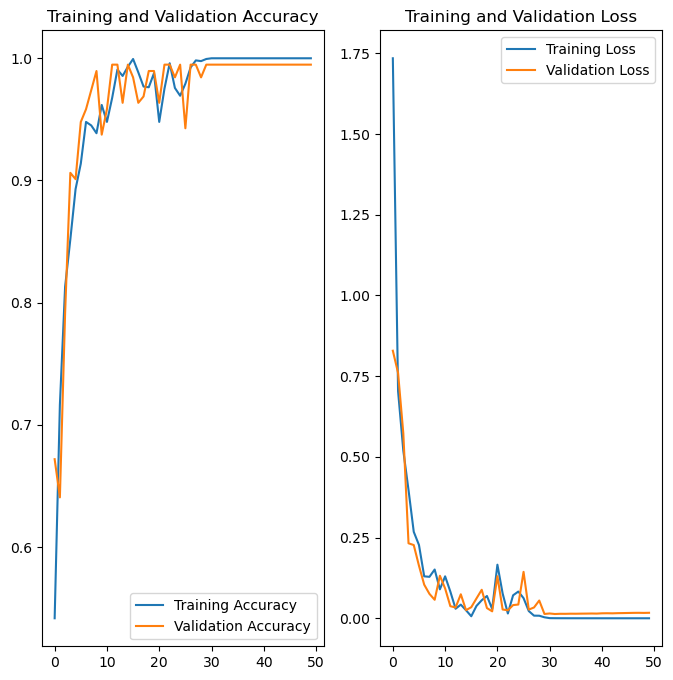

In [169]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
predicted label: Potato___Early_blight


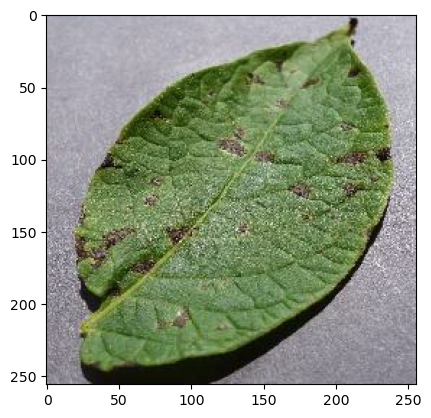

In [188]:
import numpy as np


for images, labels in test_ds.take(1):
    first_image = images[3].numpy().astype('uint8')
    first_label = labels[3].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [189]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


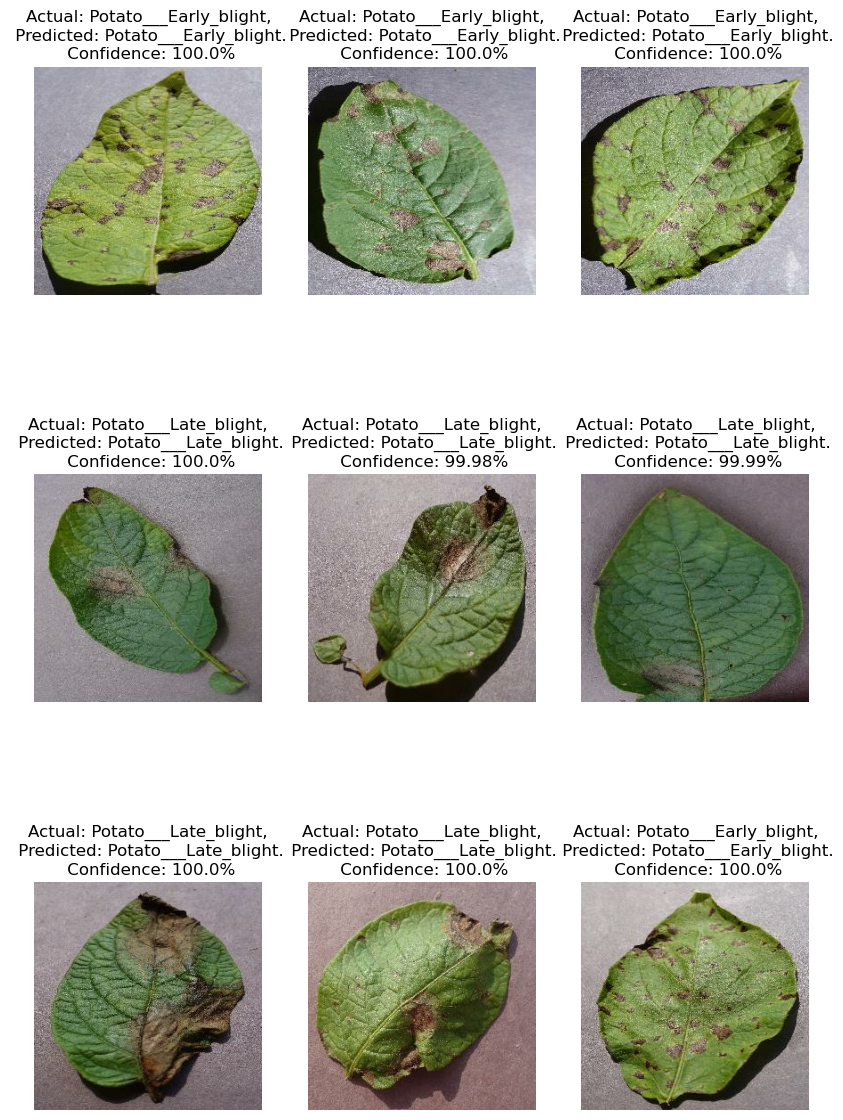

In [196]:
plt.figure(figsize=(10, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [206]:
model_version = 'v1'
model.save(fr"C:\Users\Asus\OneDrive\Tài liệu\Desktop\data_sets\Potato_Dataset\potato_project_model_save\{model_version}.keras")

